In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)
#%cd "/content/drive/My Drive/研究所/論文研究/COVID-19/SEIR"

讀取資料

In [2]:
df = pd.read_excel("Israel-covid19-2020-0221-2022-0228.xlsx", sheet_name = "工作表2")
df.shape

(739, 14)

## 實驗函數

In [3]:
def deriv_1(x, t, alpha, beta, gamma, episilon):
    s, e, i, r, d = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - episilon * e
    didt = episilon * e - (gamma + alpha) * i
    drdt =  gamma * i
    dddt = alpha * i 
    return [dsdt, dedt, didt, drdt, dddt]

In [4]:
# parameter values
R0 = 2.4

total_population = 9291000

# initial number of infected and recovered individuals
i_initial = 1 / total_population
e_initial = np.random.uniform(low=2*i_initial, high=20*i_initial, size=(1)) 
r_initial = 0.0
d_initial = 0.0
s_initial = 1 - e_initial - i_initial - r_initial - d_initial

alpha = np.random.uniform(low=5e-6, high=1e-4, size=(1)) 
beta = np.random.uniform(low=0.05, high=1, size=(1)) 
gamma = np.random.uniform(low=1/9, high=1/4, size=(1)) 
episilon = np.random.uniform(low=1/5.6, high=1/4.8, size=(1)) 


days = len(df)
t = np.linspace(0, days, days)
x_initial = s_initial, e_initial, i_initial, r_initial, d_initial
soln = odeint(deriv_1, x_initial, t, args=(alpha[0], beta[0], gamma[0], episilon[0]))
s, e, i, r, d= soln.T
#print(f's = {s}\ne = {e}\ni = {i}\nr = {r}')
print(f'Random Search')
print(f'Simulated parameters : \nalpha = {alpha}\nbeta = {beta}\ngamma = {gamma}\nepisilon = {episilon}\ne_initial = {e_initial}')
print(f'day : {days}\ns = {s[-1]}, s_p = {s[-1] * total_population}\ne = {e[-1]}, e_p = {e[-1] * total_population}\ni = {i[-1]}, i_p = {i[-1] * total_population}\nr = {r[-1]}, r_p = {r[-1] * total_population}\nd = {d[-1]}, d_p = {d[-1] * total_population}')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [5]:
# Random search for e_initial, alpha, beta, gamma, episilon 
def SEIRD(e_initial, alpha, beta, gamma, episilon):

    R0 = 2.4
    total_population = 9291000  

    i_initial = 1 / total_population
    # e_initial = np.random.uniform(low=2*i_initial, high=20*i_initial, size=(1)) 
    r_initial = 0.0
    d_initial = 0.0
    s_initial = 1 - e_initial - i_initial - r_initial - d_initial

    # alpha = np.random.uniform(low=5e-6, high=1e-4, size=(1)) 
    # beta = np.random.uniform(low=0.05, high=1, size=(1)) 
    # gamma = np.random.uniform(low=1/9, high=1/4, size=(1)) 
    # episilon = np.random.uniform(low=1/5.6, high=1/4.8, size=(1)) 

    days = len(df)
    t = np.linspace(0, days, days)
    x_initial = s_initial, e_initial, i_initial, r_initial, d_initial
    soln = odeint(deriv_1, x_initial, t, args=(alpha, beta, gamma, episilon))
    s, e, i, r, d= soln.T

    return i, r

from sklearn.metrics import mean_squared_error

def RMSE(real_i, real_r, pred_i, pred_r):
    
    RMSE_i = np.sqrt(mean_squared_error(real_i, pred_i))
    RMSE_r = np.sqrt(mean_squared_error(real_r, pred_r))

    return RMSE_i, RMSE_r

def RandomSearch_P(i_initial, len):

    e_initial_lst = np.random.uniform(low=2*i_initial, high=20*i_initial, size=(len)) 

    alpha_lst = np.random.uniform(low=5e-6, high=1e-4, size=(len)) 
    beta_lst = np.random.uniform(low=0.05, high=1, size=(len)) 
    gamma_lst = np.random.uniform(low=1/9, high=1/4, size=(len)) 
    episilon_lst = np.random.uniform(low=1/5.6, high=1/4.8, size=(len)) 

    return e_initial_lst, alpha_lst, beta_lst, gamma_lst, episilon_lst



In [6]:
real_i = np.array(df["total_infectious"])
real_r = np.array(df["total_recovered"])
#real_i


In [7]:
# Random search for 100 times
times = 100
total_population = 9291000 
e_initial_lst, alpha_lst, beta_lst, gamma_lst, episilon_lst = RandomSearch_P(1/total_population, times)

data = {}
for i in range(times):
    
    pred_i, pred_r = SEIRD(e_initial_lst[i], alpha_lst[i], beta_lst[i], gamma_lst[i], episilon_lst[i])
    RMSE_i, RMSE_r = RMSE(real_i, real_r, pred_i * total_population, pred_r * total_population)
    data[i] = {"RMSE_i" : RMSE_i, "RMSE_r" : RMSE_r, "e_initial" : e_initial, "alpha" : alpha, "beta" : beta, "gamma" : gamma, "episilon" : episilon}


In [8]:
data.items()

dict_items([(0, {'RMSE_i': 368907.9990170352, 'RMSE_r': 7998946.448486585, 'e_initial': array([1.26643825e-06]), 'alpha': array([7.39262597e-05]), 'beta': array([0.12786302]), 'gamma': array([0.20670963]), 'episilon': array([0.18177128])}), (1, {'RMSE_i': 416719.3689423454, 'RMSE_r': 8041471.368028731, 'e_initial': array([1.26643825e-06]), 'alpha': array([7.39262597e-05]), 'beta': array([0.12786302]), 'gamma': array([0.20670963]), 'episilon': array([0.18177128])}), (2, {'RMSE_i': 399526.1568375536, 'RMSE_r': 8133029.759048063, 'e_initial': array([1.26643825e-06]), 'alpha': array([7.39262597e-05]), 'beta': array([0.12786302]), 'gamma': array([0.20670963]), 'episilon': array([0.18177128])}), (3, {'RMSE_i': 420440.94410304195, 'RMSE_r': 8021047.625666856, 'e_initial': array([1.26643825e-06]), 'alpha': array([7.39262597e-05]), 'beta': array([0.12786302]), 'gamma': array([0.20670963]), 'episilon': array([0.18177128])}), (4, {'RMSE_i': 369324.1300786935, 'RMSE_r': 8026254.888064276, 'e_initi

In [9]:
sort_by_RMSE_i = sorted(data.items(), key = lambda x : x[1]["RMSE_i"])
sort_by_RMSE_r = sorted(data.items(), key = lambda x : x[1]["RMSE_r"])
sort_by_RMSE_i_plus_r = sorted(data.items(), key = lambda x : x[1]["RMSE_i"] + x[1]["RMSE_r"])

In [11]:
# 發現基本上這三個算法的排序應該幾乎相同，因此使用["RMSE_i"] + ["RMSE_r"] 做排序
# sort_by_RMSE_i
# sort_by_RMSE_r
sort_by_RMSE_i_plus_r

[(51,
  {'RMSE_i': 63703.38665239536,
   'RMSE_r': 655654.0618520323,
   'e_initial': array([4.11667481e-07]),
   'alpha': array([8.8069185e-06]),
   'beta': array([0.16518057]),
   'gamma': array([0.12550625]),
   'episilon': array([0.19558509])}),
 (50,
  {'RMSE_i': 70451.88869529763,
   'RMSE_r': 675189.2022316707,
   'e_initial': array([4.11667481e-07]),
   'alpha': array([8.8069185e-06]),
   'beta': array([0.16518057]),
   'gamma': array([0.12550625]),
   'episilon': array([0.19558509])}),
 (61,
  {'RMSE_i': 76824.42914816683,
   'RMSE_r': 951641.6548954147,
   'e_initial': array([4.11667481e-07]),
   'alpha': array([8.8069185e-06]),
   'beta': array([0.16518057]),
   'gamma': array([0.12550625]),
   'episilon': array([0.19558509])}),
 (3,
  {'RMSE_i': 79051.30808681638,
   'RMSE_r': 981033.1681853599,
   'e_initial': array([4.11667481e-07]),
   'alpha': array([8.8069185e-06]),
   'beta': array([0.16518057]),
   'gamma': array([0.12550625]),
   'episilon': array([0.19558509])}),
 

In [10]:
total_population = 9291000
9.69116606e-07 * total_population

9.004062386346

#### 實驗結果分析
(81,
  {'RMSE_i': 71225.11478819526,
   'RMSE_r': 743185.2988013381,
   'alpha': array([6.21923485e-05]),
   'beta': array([0.67745532]),
   'e_initial': array([9.69116606e-07]),
   'episilon': array([0.1789692]),
   'gamma': array([0.15300966])})

第81組參數算出最低的RMSE，其參數為:

e_initial = 9.69116606e-07, 乘上total_population後得出9.004062386346，將無條件捨去為9(人)

alpha = 6.21923485e-05

beta = 0.67745532

episilon = 0.1789692

gamma = 0.15300966

### 其他Function

In [11]:
def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()

In [12]:
alpha = np.random.uniform(low=5e-6, high=1e-4, size=(50,)) 
beta = np.random.uniform(low=0.05, high=1, size=(50,)) 
gamma = np.random.uniform(low=1/9, high=1/4, size=(50,)) 
episilon = np.random.uniform(low=1/5.6, high=1/4.8, size=(50,)) 
print(alpha, beta, gamma, episilon)

[8.60634274e-05 2.08953576e-05 4.75789522e-05 5.48263230e-05
 6.03923803e-05 3.27936605e-05 8.63094117e-05 5.66532884e-05
 2.55356023e-05 5.60743055e-05 6.89165613e-06 2.85303544e-05
 5.34147891e-05 8.57621577e-05 6.02297987e-05 5.91322163e-05
 7.60832282e-05 7.96027063e-05 5.68045220e-05 1.89332309e-05
 7.15116707e-05 9.42395905e-05 8.53107390e-05 4.18986065e-05
 4.93138509e-05 3.76461722e-05 1.64401840e-05 1.47835943e-05
 9.60986254e-05 7.50975611e-05 9.94056385e-05 2.57772863e-05
 7.30374886e-05 2.65569806e-05 9.50334873e-05 4.39164006e-05
 5.85288383e-05 6.24991595e-05 7.15784157e-05 8.41170639e-05
 4.06907103e-05 4.15373462e-05 1.17832778e-05 3.72310570e-05
 7.99140381e-05 7.60356076e-05 3.77188742e-05 1.56629009e-05
 6.00456579e-05 3.13192861e-05] [0.80861357 0.76561183 0.57687287 0.14990017 0.3585328  0.67049423
 0.86685401 0.53905223 0.0825155  0.69261631 0.41181517 0.35111069
 0.80895331 0.3506091  0.63194205 0.57509799 0.80382094 0.48760041
 0.77046781 0.93314955 0.55237166 0

day : 467
s = 0.12140417049070128, s_p = 1127966.1480291055
e = -6.350234011780887e-12, e_p = -5.900002420345622e-05
i = -6.176562675209973e-12, i_p = -5.738644381537586e-05
r = 0.8785958295218252, r_p = 8163033.852087278


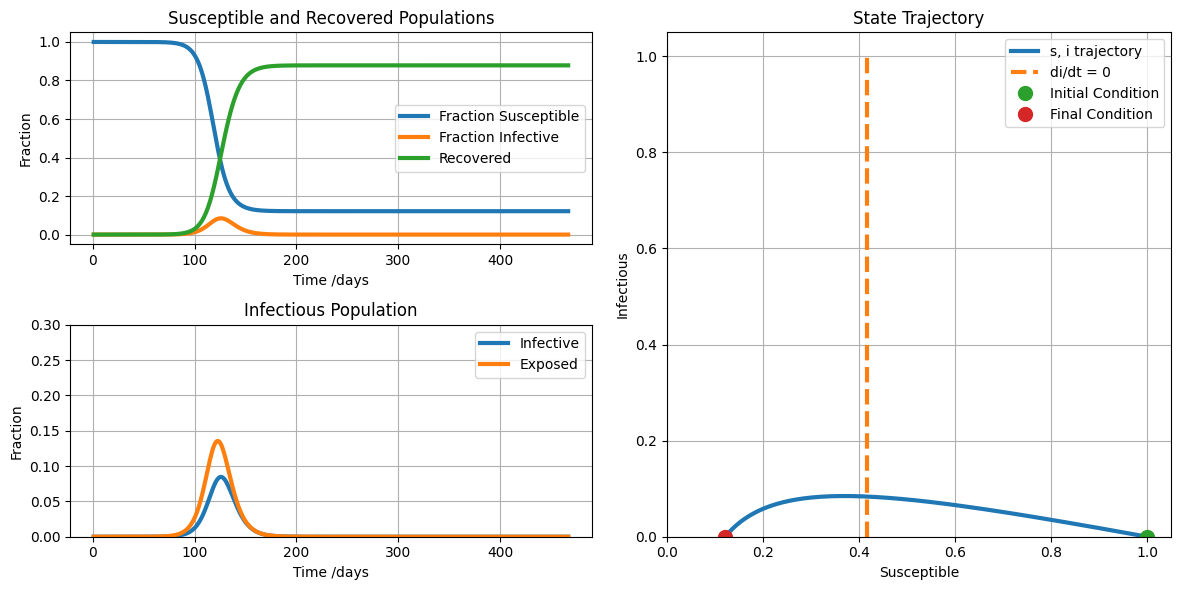

In [20]:
# 最基本的SEIR模型

# parameter values
R0 = 2.4

# Been infected but not contagious to contagious : 5.1 days ; Contagious to Recovered : 3.3 days. 
t_incubation = 5.1
t_infective = 3.3

total_population = 9291000

# initial number of infected and recovered individuals
e_initial = 1/total_population
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

days = 467
t = np.linspace(1, days, days-1)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T
#print(f's = {s}\ne = {e}\ni = {i}\nr = {r}')
print(f'day : {days}\ns = {s[-1]}, s_p = {s[-1] * total_population}\ne = {e[-1]}, e_p = {e[-1] * total_population}\ni = {i[-1]}, i_p = {i[-1] * total_population}\nr = {r[-1]}, r_p = {r[-1] * total_population}')
plotdata(t, s, i, e)

In [19]:
for d in range(1, len(t)+1):
    x_initial = s_initial, e_initial, i_initial, r_initial
    soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
    s, e, i, r = soln.T
    print(f'day {d} : s = {s[d-1]}, e = {e[d-1]}, i = {i[d-1]}, r = {r[d-1]}')
#print(s)

day 1 : s = 0.9999998923689593, e = 1.0763104079216446e-07, i = 0.0, r = 0.0
day 2 : s = 0.9999998861000396, e = 9.403856946856246e-08, i = 1.7249340802986387e-08, r = 2.6120501541089857e-09
day 3 : s = 0.9999998682575546, e = 9.404862613808993e-08, i = 2.764739942926893e-08, r = 1.0046419793725909e-08
day 4 : s = 0.9999998428750458, e = 1.0132984726251627e-07, i = 3.5172640214642163e-08, r = 2.0622466608148236e-08
day 5 : s = 0.9999998122261345, e = 1.1203416982504458e-07, i = 4.234684705133797e-08, r = 3.3392848503786925e-08
day 6 : s = 0.9999997772678036, e = 1.243003151365312e-07, i = 5.047305847829407e-08, r = 4.79588227043181e-08
day 7 : s = 0.9999997371882643, e = 1.38561431089517e-07, i = 5.95916697441039e-08, r = 6.465863484350568e-08
day 8 : s = 0.9999996903685336, e = 1.5639345528965835e-07, i = 6.907114944842969e-08, r = 8.416686153484809e-08
day 9 : s = 0.9999996362951827, e = 1.7767474517853473e-07, i = 7.933263990803046e-08, r = 1.0669743197294092e-07
day 10 : s = 0.9999

/var/folders/t4/mygrc6956hq4wjs1tw5tlm1w0000gn/T/ipykernel_41821/557674609.py:75: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
/var/folders/t4/mygrc6956hq4wjs1tw5tlm1w0000gn/T/ipykernel_41821/557674609.py:75: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()
/Users/gilbert/miniconda3/envs/new-test-conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gilbert/miniconda3/envs/new-test-conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


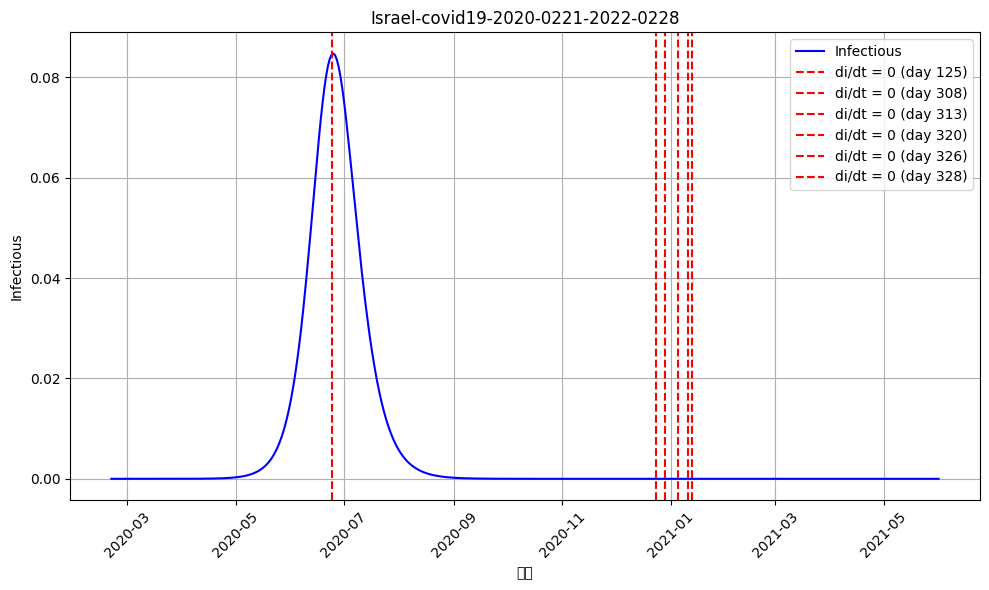

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import odeint

# Parameters
R0 = 2.4
t_incubation = 5.1
t_infective = 3.3
total_population = 9291000

# Initial number of infected and recovered individuals
e_initial = 1 / total_population
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1 / t_incubation
gamma = 1 / t_infective
beta = R0 * gamma

# SEIR model differential equations
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return [dsdt, dedt, didt, drdt]

# Time grid
days = 467
t = np.linspace(1, days, days)

# Initial conditions vector
x_initial = s_initial, e_initial, i_initial, r_initial

# Integrate the SEIR equations over the time grid, t.
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

# Calculate the derivative of the infected compartment
di_dt = np.gradient(i, t)

# Find the points where the derivative is zero
zero_crossings = np.where(np.diff(np.sign(di_dt)))[0]

# Extract the points where the derivative is zero
infectious_zero_points = t[zero_crossings]

# Simulate date data for plotting purposes
dates = np.arange('2020-02-21', '2022-02-28', dtype='datetime64[D]')
dates = dates[:len(t)]

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the infectious curve
ax.plot(dates, i, label='Infectious', color='blue')

# Mark the points where di/dt = 0
for zero_point in infectious_zero_points:
    ax.axvline(x=dates[int(zero_point)-1], color='red', linestyle='--', label=f'di/dt = 0 (day {int(zero_point)})')

# Formatting the plot
ax.set_title('Israel-covid19-2020-0221-2022-0228')
ax.set_xlabel('时间')
ax.set_ylabel('Infectious')
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
